# <center>Hackathon Data Science Visagio 2019</center>
### <center>Desafio de e-commerce</center>

Nesse *notebook* é apresentado o problema e a possível solução para o pré-hackathon da Visagio e que servirá de base para o Hackathon presencial que ocorrerá no dia 31 de Agosto. Vamos então ao nosso desafio!

## 1. Introdução do Desafio

Os dados utilizados nesse desafio são do e-commerce da Imaginarium.

![img](https://www.neomind.com.br/wp-content/uploads/2015/06/Imaginarium-e-Neomind-Case-de-Sucesso.png)

Criada em 1991, a Imaginarium é reconhecida no mercado brasileiro como uma das maiores marcas de presentes criativos e inovadores, além de ser reconhecida nacional e internacionalmente por antecipar conceitos e tendências em eletrônicos, utilitários e presentes. A inovação é característica fundamental da marca que busca surpreender seus consumidores, lançando 400 novos itens por ano. Atualmente, possuímos 186 operações exclusivas: 192 lojas, 12 quiosques e 650 pontos multimarcas em todo o Brasil.

O site do e-commerce pode ser acessado [aqui!](https://loja.imaginarium.com.br)

![mag_present](https://media.giphy.com/media/l2Sq4fHpeKTNQs6Zy/giphy.gif)

## 2. O problema: Sistemas de Recomendação

O ['Experimento da Geléia'](https://faculty.washington.edu/jdb/345/345%20Articles/Iyengar%20%26%20Lepper%20(2000).pdf) foi um estudo feito por cientistas americanos, que colocaram a venda 24 tipos diferentes de geleias em um mercado durante um determinado período, e em um outro momento colocaram menos escolhas, apenas 6 tipos diferentes de geleia. O objetivo do experimento era saber qual formação iria vender mais. O que foi observado é que mais pessoas foram atraídas quando 24 tipos de geléia estavam dispostas na prateleira, porém a sua conversão em vendas foi 10 vezes menor que a formação com 6 tipos de geléia.

<img src=https://miro.medium.com/max/1396/1*_aUEQxvHqb5mY2TOBhULoA.png width="500">

O estudo nos leva a entender que ter muitas opções pode parecer atraente, mas pode trazer confusão e angústia para os clientes, atrapalhando a experiência de compra. Os sistemas de recomendação são úteis nesse contexto para ajudar o cliente no objetivo final de comprar, ganhando tempo e aumentando a conversão das lojas.

__Sistemas de Recomendação__ estão entre as aplicações mais comuns e disseminadas de *Data Science* atualmente, principalmente em serviços online, onde existe muita informação disponível, permitindo recomendações personalizadas de produtos e serviços.

<img src=https://miro.medium.com/max/1400/1*fIpNnHiK7pfdTtEt6Tyqpg.gif width="500">
<center>*Alguém aqui fica mais tempo nessa tela do que vendo um filme?*</center>


### Abordagens de Recomendações

Existem duas principais formas de abordar o problema: *__collaborative filtering__* (ou filtragem colaborativa) e *__content-based recommendations__* (ou recomendação por conteúdo).

Na __filtragem colaborativa__, a ideia é recomendar para o usuário produtos que pessoas com gostos similares gostaram no passado. Ou seja, o algorítmo tenta prever qual seria a avaliação do usuário para o produto.

<img src=https://upload.wikimedia.org/wikipedia/commons/5/52/Collaborative_filtering.gif width="300">
<center>Ilustrativo: Filtragem Colaborativa</center>



Já na __recomendação por conteúdo__, são recomendados produtos similares àqueles que o usuário gostou. São levantadas características dos produtos e os mais semelhantes aos bem avaliados por ele lhe são oferecidos.

<img src=https://miro.medium.com/max/568/0*RvaBE9dpX8bB8R3b width="300">
<center>Ilustrativo: Recomendação por Conteúdo</center>

Vamos primeiro focar nossos esforços na abordagem da filtragem colaborativa. Mas antes vamos entender melhor o nosso caso.

### Nossa base de dados

A Imaginarium conta com mais de 16 mil SKUs (ou *Stock Keeping Units* ou simplesmente produtos) diferentes e, pensando em trazer comodidade para o amigo internauta, o problema proposto é a criação de um sistema de recomendação auxiliando os visitantes do site a terem uma ajuda na hora de decidir pelo melhor produto.

O site de compras da Imaginarium permite que os clientes avaliem os produtos comprados, como podemos ver na imagem abaixo.

<img src=https://imgur.com/SSspCtG.png width="700">

A base que iremos utilizar nesse desafio é exatamente o registro de mais de 17 mil avaliações feitas pelos clientes entre janeiro de 2017 e julho de 2019. 

- [Link para download da base](https://drive.google.com/file/d/1EIDuLoU7G8e2JpMglC3GR2deO8G09wry/view?usp=sharing)


Vamos iniciar importando as bibliotecas necessárias para a leitura das bases.

In [2]:
# importa as libs que serao utilizadas na leitura do arquivo
import pandas as pd
import pandas_profiling as pp
import numpy as np

In [3]:
# le base de reviews dos produtos
# no caso abaixo, a base foi salva dentro de uma pasta chamada 'data' que fica junto com o notebook
reviews = pd.read_csv('data/reviews_produtos_img.csv', sep=',', decimal='.', encoding='utf8')

# amostra da base
reviews.head()

/home/marcio/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ReviewId,Rating,Review,Date,Likes,Dislikes,CustomFields_Gênero,CustomFields_Idade,CustomFields_Você recomendaria esse produto a um amigo?,CustomFields_É pra presente ?,...,Product_ProductDeliveryDate,Product_IsProductDelivered,Product_IsProductCancelled,ReferenceOrder,CustomerPhotos,ReviewTitle,BoughtProduct,HasErrors,Total,CurrentPage
0,855086,5,"A mochila mais linda que já tive, levo para to...",2017-08-10 15:40:15,126,115,NaN,NaN,10,NaN,...,0001-01-01T00:00:00,FALSO,FALSO,NaN,NaN,NaN,VERDADEIRO,FALSO,18346,1
1,1986798,4,Só não sei nota maior porque achei o produto b...,2018-08-29 11:56:53,51,12,Feminino,de 27 a 32 anos,Sim,Sim,...,0001-01-01T00:00:00,FALSO,FALSO,NaN,NaN,NaN,VERDADEIRO,FALSO,18346,1
2,1324445,5,Olá gostaria de saber quando haverá uma repos...,2017-12-18 13:25:50,47,1,NaN,NaN,NaN,Não,...,0001-01-01T00:00:00,FALSO,FALSO,NaN,NaN,NaN,FALSO,FALSO,18346,1
3,1333721,5,Comprei a câmera rose há uma semana e estou go...,2017-12-21 21:10:45,45,6,NaN,NaN,NaN,Não,...,0001-01-01T00:00:00,FALSO,FALSO,NaN,NaN,NaN,FALSO,FALSO,18346,1
4,1302113,5,"Produto excelente, com bom material, boa estét...",2017-12-07 12:20:59,43,2,NaN,NaN,NaN,NaN,...,0001-01-01T00:00:00,FALSO,FALSO,NaN,NaN,NaN,FALSO,FALSO,18346,1


O código abaixo faz uma análise mais completa da base, mostrando suas principais estatísticas e distribuições. Pode demorar um pouco para rodar.

In [0]:
# faz profiling da base
pp.ProfileReport(reviews)

Number of variables,40
Number of observations,17065
Total Missing (%),39.9%
Total size in memory,5.2 MiB
Average record size in memory,320.0 B
Numeric,7
Categorical,14
Boolean,0
Date,0
Text (Unique),0
Rejected,19


## 3. Filtragem Colaborativa

Vamos, então, focar nossas análises nas avaliações dos produtos pelos clientes e entender como é possível oferecer produtos para um cliente, dada a avaliação de clientes com gosto parecido.

In [0]:
ratings = reviews[['Product_ProductId', 'User_Id', 'Rating']]
ratings.head()

,Product_ProductId,User_Id,Rating
0,12403,10001,5
1,14912,10002,4
2,13711,10003,5
3,13378,10004,5
4,13131,10005,5


### Análise Exploratória

#### Notas
Podemos analisar como se distribui a nota dos produtos.

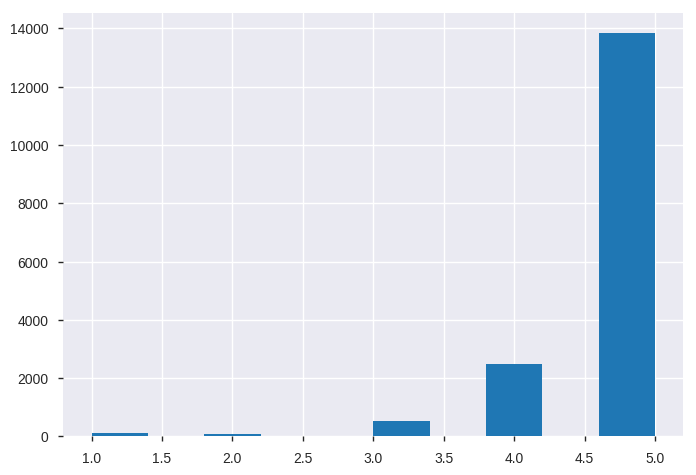

In [0]:
ratings.Rating.hist()

É possível verificar que a maior parte dos clientes avalia os produtos com 5 estrelas.

#### Clientes recorrentes
Vamos verificar agora a recorrência dos avaliadores.

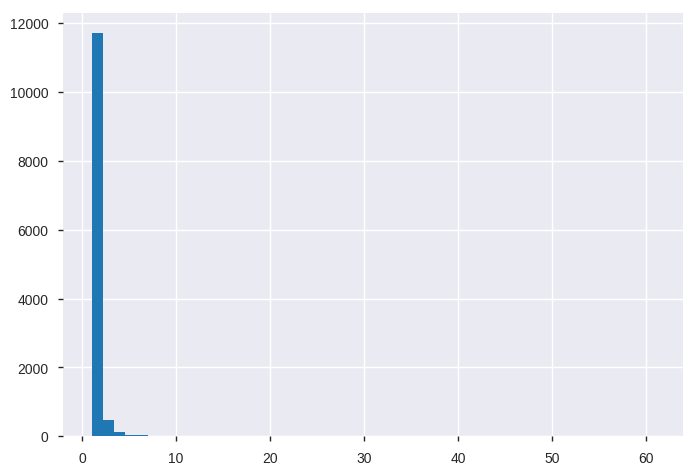

In [0]:
qtd_user_ratings = ratings[['User_Id', 'Rating']].groupby(['User_Id'], as_index=False).count()
qtd_user_ratings.Rating.hist(bins=50)

In [0]:
qtd_user_ratings.sort_values('Rating', ascending=False)[:10]

,User_Id,Rating
15,10016,61
3134,13135,41
872,10873,16
4619,14620,15
68,10069,13
2973,12974,13
3127,13128,11
2721,12722,11
573,10574,11
3411,13412,11


In [0]:
qtd_user_ratings.groupby(['Rating']).count()

,User_Id
Rating,
1,9245
2,2455
3,469
4,138
5,50
6,35
7,14
8,5
9,12


Podemos concluir que a grande parte dos clientes só avaliou um produto. Mesmo assim, ainda temos mais de 3 mil clientes diferentes com duas ou mais avaliações.

#### Produtos recorrentes
Vamos analisar agora a recorrência dos produtos avalidos.

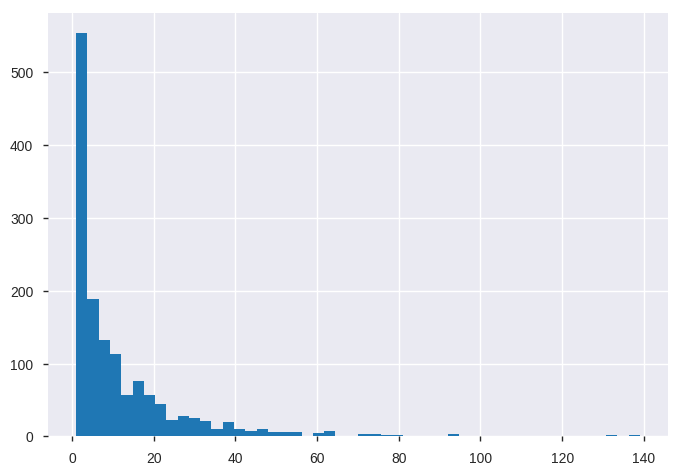

In [0]:
qtd_prod_ratings = ratings[['Product_ProductId', 'Rating']].groupby(['Product_ProductId'], as_index=False).count()
qtd_prod_ratings.Rating.hist(bins=50)

In [0]:
qtd_prod_ratings.sort_values('Rating', ascending=False)[:10]

,Product_ProductId,Rating
629,11028,139
181,6724,137
6,31,133
1032,13322,132
170,6688,130
343,7180,101
397,8116,94
632,11111,94
626,10981,94
921,13091,92


Podemos ver que a maioria dos produdos recebeu menos que 5 avalições e o produto com maior número de avaliação chegou a quase 140 avaliações.

Agora vamos retirar da base os produtos e clientes com poucas avaliações para garantir uma significancia dos resultados.

In [0]:
min_prod_ratings = 3
filtro_prod = ratings['Product_ProductId'].value_counts() >= min_prod_ratings
filtro_prod = filtro_prod[filtro_prod].index.tolist()

min_user_ratings = 2
filtro_user = ratings['User_Id'].value_counts() >= min_user_ratings
filtro_user = filtro_user[filtro_user].index.tolist()

ratings_filtro = ratings[(ratings['Product_ProductId'].isin(filtro_prod)) & (ratings['User_Id'].isin(filtro_user))]
print('Número de linhas e colunas da base original:\t{}'.format(ratings.shape))
print('Número de linhas e colunas da base filtrada:\t{}'.format(ratings_filtro.shape))

Número de linhas e colunas da base original:	(17065, 3)
Número de linhas e colunas da base filtrada:	(7550, 3)


### Modelagem: lib Surprise

O Python possui a biblioteca [`Surprise`](https://www.youtube.com/watch?v=_bSEfx6D8mA) que auxilia na formulação de sistemas de recomendação de filtragem colaborativa. [Nesse link](http://surpriselib.com), podemos acessar a página com as principais funções e tutoriais de instalação e uso do pacote.

Primeiramente vamos importar algumas funções que iremos utilizar, definir o modo de leitura dos dados e o intervalo possivel das notas das avaliações.

Para ler os dados de um pandas data frame é necessário utilizar a função `load_from_df`, indicando no objeto `Reader` a escala das notas. É preciso também indicar as colunas que contém a identificação dos usuários, produtos e as notas, nessa ordem. Cada linha da base deve ser referente a uma avaliação.

In [0]:
from surprise import Reader, Dataset

reader = Reader(rating_scale=(1, 5)) # as notas no nosso problema variam entre 1 e 5

##adicionar colula normalizada
ratings_filtro['Rating_norm'] = media_norm
data = Dataset.load_from_df(ratings_filtro[['User_Id', 'Product_ProductId', 'Rating_norm']], reader)
ratings_filtro[['User_Id', 'Product_ProductId', 'Rating_norm']]

A biblioteca `Surprise` aceita diversos algoritmos diferentes. Alguns deles são descritos abaixo. A lista completa pode ser encontrada [aqui](https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html).
- NormalPredictor: algorítmo que prevê uma avaliação aleaória baseado na distribuíção da base de treino, que é assumida como normal.
- BaselineOnly: algorítimo que prevê a avaliação base para um produto-usuário.
- KNNBasic: algorítimo básico de filtragem colaborativa usando K-Nearest Neighbors.
- KNNWithMeans: parecido com o algorítimo acima, mas leva em consideração a média das avaliaçoes dos usuários.
- KNNWithZScore: usa KNN e faz a normalização por usuário
- SVD algorithm: Decomposição em Valores Singulares
- SVDpp algorithm: Decomposição em Valores Singulares com avaliações implícitas

Podemos escolher ainda entre duas métricas para a definição do modelo:
- *Stochastic Gradient Descent (SGD)*
- *Alternating Least Squares (ALS)*

Por fim, podemos ainda definir qual a medida de similaridade que vamos usar para ver quão próximo os clientes/produtos são. Mais informações podem ser encontradas [aqui](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measure-configuration).

Vamos construir um modelo usando o algorítmo `KNNBasic`, a métrica baseline `SGD` e a medida de similaridade `cosine`.

In [0]:
from surprise import KNNBasic, accuracy
from surprise.model_selection import train_test_split

# Metrica SGD
baseline = {'method': 'sgd',
            'learning_rate': .00005
           }

# similaridade de cosine
similaridade = {'name': 'cosine',
                'user_based': False  # similaridade entre produtos
               }

# algoritimo KNNBasic
algoritmo = KNNBasic(bsl_options=baseline, sim_options=similaridade)

# separa a base entre treino e teste
trainset, testset = train_test_split(data, test_size=0.25)

# faz a previsão para a base de teste
predictions = algoritmo.fit(trainset).test(testset)

# metrica de erro da base de teste
accuracy.rmse(predictions)

In [0]:
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split

benchmark = []
for algoritmo in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    results = cross_validate(algoritmo, data, measures=['RMSE'], cv=3, verbose=False)

    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algoritmo).split(' ')[0].split('.')[-1]], index=['Algoritmo']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algoritmo').sort_values('test_rmse')

Temos um modelo treinado para prever a avaliação do usuário para um produto dada a avaliação de outros produtos!

A métrica de erro (raíz do erros quadráticos) da base de teste foi de 0,597. Será que mudando os parâmetros ou o algoritmo conseguimos modelos com erros menores?

Vamos olhar quais foram as avaliações mais próximas e as mais longe da realidade.

In [0]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['err'] = abs(df.est - df.rui)
menores_erros = df.sort_values(by='err')[:10]
maiores_erros = df.sort_values(by='err')[-10:]

In [0]:
menores_erros

In [0]:
maiores_erros

## 4. Content-based Recommendation

Nessa abordagem, vamos recomendar um produto que seja similar a um que o cliente avaliou bem ou comprou.

Primeiramente, devemos definir o que são produtos similares. Existem diversas formas de fazer isso e, para o exemplo a seguir, iremos usar o nome e os comentários já feitos pelos produtos para medir sua similaridade.

Usaremos *NLP* ou *Natural Language Processing* para analisar os comentários e calcular a similaridade entre itens. Vamos juntar todos os comentários já feitos para aquele produto em um único registro.

### Preparação dos dados

Vamos selecionar as colunas relevantes da nossa base.

In [0]:
coment = reviews[['Product_ProductId', 'Product_Name', 'Review']]
coment.head()

Muda o tipo das colunas para *string*

In [0]:
coment.Product_ProductId = coment.Product_ProductId.astype(str)
coment.Review = coment.Review.astype(str)
coment.Product_Name = coment.Product_Name.astype(str)

Agrupa pelo produto todos os comentários ja feitos.

In [0]:
prod_coment = coment.groupby(['Product_ProductId', 'Product_Name'])['Review'].apply(' '.join).reset_index()

In [0]:
prod_coment.head()

Concatena o nome do produto com a coluna com os comentários.

In [0]:
prod_coment['nome_coment'] = prod_coment['Product_Name'] +' '+ prod_coment['Review']
prod_coment.drop(['Product_Name', 'Review'], axis=1, inplace=True)
prod_coment.head()

Muda o tipo da coluna para texto, novamente.

In [0]:
prod_coment.Product_ProductId = prod_coment.Product_ProductId.astype(str)

Utilizaremos abaixo uma função para limpar os comentários de palavras que não agregam valor à análise.

In [0]:
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# fazer download do dicionário de palavras de parada
nltk.download('stopwords')

def clean_text(text):
    # coloca o texto em caixa baixa
    text = text.lower()
    # tira virgula
    text = text.replace(',', ' ')
    # tira pontuacao e separa as palavras
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # tira palavras que contem numeros
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # tira artigos e preposicoes da lingua portuguesa
    stop = stopwords.words('portuguese')
    text = [x for x in text if x not in stop]
    # tira palavras vazias
    text = [t for t in text if len(t) > 0]
    # tira a palavra 'nan' que apareceu em determinados casos no group by
    text = [t for t in text if t not in ['nan', 'produto']]
    # tira palavra com uma so letra
    text = [t for t in text if len(t) > 1]
    # junta tudo novamente
    text = " ".join(text)
    return(text)

# aplica a funcao para limpar o campo de texto
prod_coment['nome_coment'] = prod_coment['nome_coment'].apply(lambda x: clean_text(x))
prod_coment.head()

### Análise Exploratória

Após a limpeza e tratamento dos dados, é possível realizar análises textuais com os comentários dos produtos.

Uma forma visual de ver as palavras mais utilizadas é a __nuvem de palavras__. Aplicando a função abaixo, é possível identificar as palavras mais frequentes para descrever os produtos da Imaginarium.

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# funcao customizada da nuvem de palavras
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# mostra a nuvem de palavras
show_wordcloud(prod_coment['nome_coment'])

### Modelagem: Similaridade de Cosine

É possível medir a similaridade entre os produtos caso as palavras se repitam ao descrevê-lo. Uma métrica para realizar isso é utilizar o coeficiente de cosine para medir a similaridade entre produtos.

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# instanciando e gerando matriz
count = CountVectorizer()
count_matrix = count.fit_transform(prod_coment['nome_coment'])

# gera a matriz de similaridade de cosine
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [0]:
import numpy as np

total = cosine_sim.shape[0]*cosine_sim.shape[1]
tam = 0
for i in cosine_sim:
    tam += len(np.argwhere(i))
tam/total

A partir da matriz criada, podemos criar uma função que retorne os produtos com maior simularidade.

In [0]:
# cria uma serie para associar um produto a um numeral
# lista para realizar de-para
indices = pd.Series(prod_coment.Product_ProductId)

# define a funcao que aceita o id do produto como input e retorna os 5 produtos mais parecidos
def recommendations(id_produto, cosine_sim = cosine_sim, n_similar = 5):
    
    # inicializa a lista de produtos recomendados
    produtos_recomendados = []
    
    # paga o indice para realizar o de-para
    idx = indices[indices == id_produto].index[0]

    # cria uma seria com similaridade em ordem decrescente
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # seleciona o indice dos 5 produtos mais parecidos tirando ele proprio
    top_indexes = list(score_series.iloc[1:(n_similar + 1)].index)
    
    # popula a lista com os produtos
    for i in top_indexes:
        produtos_recomendados.append(list(prod_coment.Product_ProductId)[i])
        
    return produtos_recomendados

Podemos usar a função abaixo para retornar os 5 produtos mais similares a um produto.

In [0]:
recommendations(id_produto='10043', cosine_sim = cosine_sim)

## Desafio Hackathon

O desafio do hackathon é construir um sistema de recomendação e sugerir 10 produtos para cada cliente da lista de avaliação (que pode ser encontrada [aqui](https://drive.google.com/file/d/1qVe3Md9iClTS8CzhoGntMv3p_dxtvUen/view?usp=sharing)).


### Recap

Até aqui foram apresentados dois dos principais modelos usados para sistemas de recomendação. Para a filtragem colaborativa fizemos um modelo que estima a nota do usuário de acordo com a avaliações passadas de clientes com gosto similar. É interessante lembrar que a partir do modelo é possível estimar a nota dos clientes da base de avaliação para os produtos treinados. Em seguida, fizemos uma matriz para identificar produtos similares de acordo com os comentários feitos pelos clientes.

## Outra abordagem da equipe

Neste abordagem, tentou-se criar um grau de semelhança entre os clientes a fim de recomendar os produtos comprados por um para o outro cliente usado na comparação, rankeando e recomendando para cada um os produtos comprados pelos clientes com maior semelhança com ele.

In [3]:
## Definições de algumas funções que serão uteis para o processo
#retorna um lista com todos os clientes
def ListadeClientes(df):
    ListaClientes=[]
    for i in df['User_Id']:
        try:
            ListaClientes.index(i)
        except:
            ListaClientes.append(i)
    return(ListaClientes)

def ListadeCompras(df,UserID):
    Cliente=df.loc[(df['User_Id'])==UserID]
    lista_compra=[]
    for i in Cliente['Product_ProductId']:
        lista_compra.append(i)
    return(lista_compra)

### Definição da função de semelhança

A função recebe os produtos comprados por cada um dos clientes.

In [4]:
def GrauSemelhanca(cliente1, cliente2):
    aux = 0
    for i in cliente1:
        try:
            cliente2.index(i)
            aux += 1    
        except:
            aux = aux
    grau = (aux/len(cliente1))
    return grau

Em seguida é realizada a recomendação com base no DataFrame geral de compras:

In [5]:
def Recomendacao(df,UserID):
    listaclientes= ListadeClientes(df)
    listacompra=ListadeCompras(df,UserID)
    lista= [[],[]]
    
    for i in listaclientes:
        if UserID != i:
            listaux=ListadeCompras(df,i)
            grau=GrauSemelhanca(listacompra,listaux)
            
            if grau > 0:
                for j in listacompra:
                    try:
                        listaux.remove(j)
                    except:
                        listaux=listaux
            
            for k in listaux:
                try:
                    aux=lista[0].index(k)
                    dfaux=df.loc[(df['User_Id'])==i].loc[(df['Product_ProductId'])==lista[0][aux]]
                    lista[1][aux] += grau*(dfaux[['Rating'][k]]/5)
                except:
                    lista[0].append(k)
                    lista[1].append(grau)
            
    for i in range(0,len(lista[0])):
            for j in range(0,(len(lista[0])-i-1)):
                if lista[1][j]<lista[1][j+1]:
                    lista[0][j],lista[0][j+1] = lista[0][j+1],lista[0][j]
                    lista[1][j],lista[1][j+1] = lista[1][j+1],lista[1][j]
                    
    return(lista[0],lista[1])

Carregando a base de teste:

In [0]:
base_teste = pd.read_csv('data/base_teste.csv')
base_teste.head()

In [0]:
users_id = base_teste['User_Id'].unique()
len(users_id)

Verificando a efiência do modelo:

In [0]:
for i in range(len(users_id)):
  lista, graus = Recomendacao(reviews, users_id[i])
  for j in range(10):
    base_teste['Product_Id'][10*i+j] = lista[j]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Links de referência:
- [How to build a recommendation system for purchase data step by step](https://medium.com/datadriveninvestor/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6)
- [Recommendation systems in the real world](https://towardsdatascience.com/recommendation-systems-in-the-real-world-51e3948772f3)
- [Collaborative filtering and embeddings](https://towardsdatascience.com/collaborative-filtering-and-embeddings-part-2-919da17ecefb)
- [Building and testing recommender systems with surprise step by step](https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b)
- [How to build from scratch a content based movie recommender with NLP](https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243)
- [Machine learning for recommender systems: algorithms evaluation and cold start](https://medium.com/recombee-blog/machine-learning-for-recommender-systems-part-1-algorithms-evaluation-and-cold-start-6f696683d0ed)
- [A gentle introduction on market basket analysis association rules](https://towardsdatascience.com/a-gentle-introduction-on-market-basket-analysis-association-rules-fa4b986a40ce)